# Introducción a la IA & ML II: Regresión
En este notebook vamos a utilizar modelos de regresión para resolver dos problemas a partir de bases de datos diferentes. El código no está completo, por lo que deberéis modificar algunas celdas.
Para ambos problemas, estos serán los pasos a seguir:
1. Importar los datos
2. Procesar los datos
3. Dividir en entrenamiento y prueba
4. Entrenar los modelos
5. Evaluar los modelos

In [83]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Problema 1: Precio inmuebles California, USA
Para este primer problema, vamos a utilizar una base de datos que contiene información agregada de distritos de California, cada fila representa una zona.
Estas son las variables y sus significados:
- MedInc: ingreso medio del hogar en la zona
- HouseAge: edad media de las viviendas
- AveRooms: nº medio de habitaciones
- AveBedrms: nº medio de dormitorios
- Population: nº total de habitantes
- AveOccup: nº medio de residentes por vivienda
- Latitude: latitud
- Longitude: longitud
- MedHouseValue: precio medio de la vivienda

### 1. Importar los datos

In [84]:
data = fetch_california_housing(as_frame=True).frame

In [85]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


¿Cuántas zonas hay incluidas en nuestra base de datos?

In [86]:
print(f"Tenemos un total de {len(data)} zonas")

Tenemos un total de 20640 zonas


### 2. Procesar los datos

Una pequeña mirada a la distribución de nuestros datos

In [87]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


¿Tenemos valores ausentes/nulos?

![IQR.png](images/IQR.png)

In [88]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

¿Tenemos valores atípicos/extremos?

In [89]:
for col in data.columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]


### 3. Entrenamiento y prueba

In [90]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4302,1.9063,52.0,3.603399,0.912181,984.0,2.787535,34.09,-118.29,2.616
17739,5.9399,10.0,6.036424,1.048565,3083.0,3.402870,37.30,-121.79,2.419
1001,3.5532,36.0,4.534946,1.000000,950.0,2.553763,37.68,-121.77,1.584
4625,3.5909,25.0,4.126506,1.064759,1420.0,2.138554,34.07,-118.32,4.045
613,4.6042,51.0,6.664122,1.025445,922.0,2.346056,37.73,-122.14,2.519


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7794,3.2857,37.0,5.120000,1.151111,981.0,4.360000,33.89,-118.08,1.536
9480,1.5625,21.0,3.930909,0.923636,715.0,2.600000,39.40,-123.36,0.715
9273,7.5000,9.0,6.852632,0.931579,682.0,3.589474,38.15,-122.58,4.232
11949,3.9118,32.0,5.527059,1.063529,1479.0,3.480000,33.94,-117.44,1.141
13831,5.5875,9.0,7.593668,1.064644,2158.0,2.846966,34.51,-117.23,1.678


¿Cuál es la diferencia entre train y test?

In [91]:
print(f"Train tiene {len(train)} filas y test tiene {len(test)} filas")

Train tiene 12985 filas y test tiene 3247 filas


Antes de pasar al entrenamiento, debemos completar un último paso, separar nuestra variable objetivo de nuestras variables predictoras

In [92]:
X_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]

X_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

### 4. Entrenar el modelo
Vale, ahora tenemos nuestros datos limpios, procesados, y separados en entrenamiento y prueba.
Tenemos todo preparado para entrenar nuestro modelo, pero, ¿qué modelo debemos elegir?

Esta es la gran pregunta, y la respuesta depende de varios factores, según los cuales unos modelos u otros serán más adecuados:
- Tipo de variables predictoras
- Complejidad del modelo
- Relaciones entre las variables

Todos los modelos tienen características distintas, y se ajustan mejor a ciertos tipos de datos.
En nuestro caso TODAS nuestras variables son _______ y queremos elegir un modelo relativamente sencillo.

![MSE](images/MSE.png)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train);

### 5. Evaluar el modelo
¿Cómo podemos saber si las predicciones de nuestro modelo son buenas?

Para ello existen una serie de métricas que se calculan comparando los valores reales (y_test) con los valores que nuestro modelo ha predicho (y_pred) para los datos de prueba.
La más común es el MSE(Mean Squared Error) o Error Cuadrático Medio


In [94]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("=== Evaluación en Entrenamiento ===")
print("MSE:", mean_squared_error(y_train, y_pred_train))

print("\n=== Evaluación en Prueba ===")
print("MSE:", mean_squared_error(y_test, y_pred_test))

=== Evaluación en Entrenamiento ===
MSE: 0.31210912899399684

=== Evaluación en Prueba ===
MSE: 0.3146760712686995


También podemos usar matplotlib para ver nuestros resultados de manera más visual

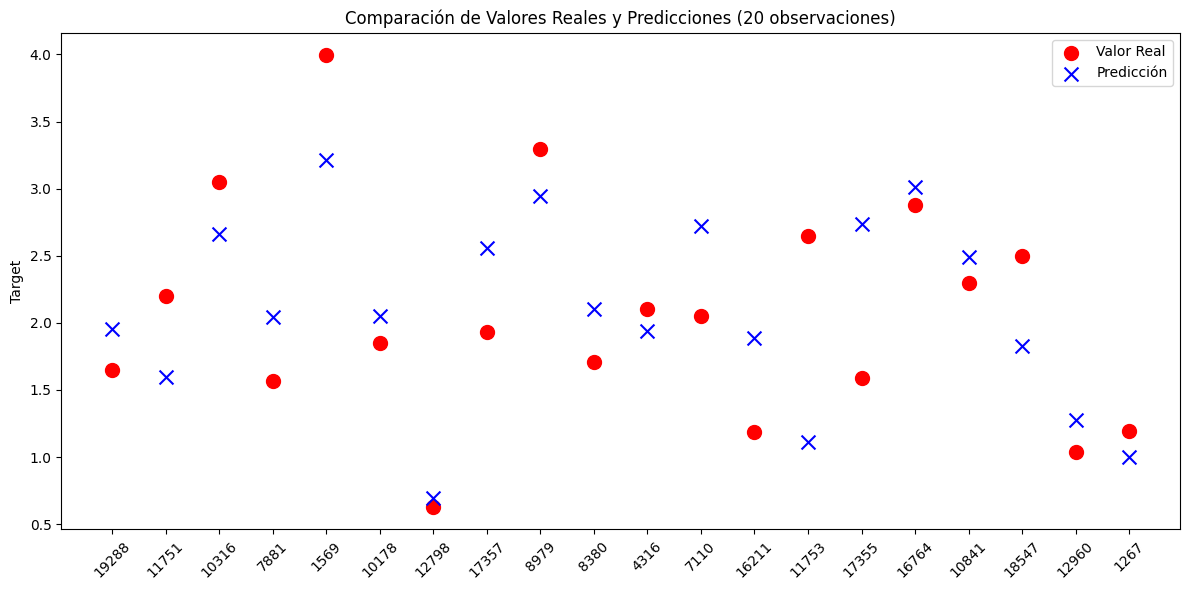

In [95]:
subset = X_test.copy()
subset['y_real'] = y_test
subset['y_pred'] = model.predict(X_test)
subset_20 = subset.sample(n=20, random_state=42)

index = range(len(subset_20))

plt.figure(figsize=(12,6))

plt.scatter(index, subset_20['y_real'], color='red', label='Valor Real', s=100)
plt.scatter(index, subset_20['y_pred'], color='blue', label='Predicción', s=100, marker='x')

plt.xticks(index, subset_20.index, rotation=45)
plt.ylabel('Target')
plt.title('Comparación de Valores Reales y Predicciones (20 observaciones)')
plt.legend()
plt.tight_layout()
plt.show()